### Import required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fem_lib import Mesh2D, PoissonFEM2D

### Define a plot function for the mesh.

This is a simple auxiliary method to visualize the 2D mesh.

In [4]:
def plot_mesh2d(mesh: Mesh2D = None) -> None:
    """
    Plots a 2D mesh object.
    
    :param mesh (Mesh2D): the mesh object we want to plot.
    """

    # Make sure there is a mesh to plot.
    if mesh:

        # Create a (6 x 6) figure.
        plt.figure(figsize=(6, 6))

        # Use triplot for the nodes lines.
        plt.triplot(mesh.nodes[:, 0], mesh.nodes[:, 1],
                    mesh.elements, color='blue', linewidth=1)

        # Simple plot for the nodes themselves.
        plt.plot(mesh.nodes[:, 0], mesh.nodes[:, 1],
                 'o', color='red', markersize=4)

        # Add axes labels.
        plt.title(f"Mesh2D: [{mesh.x_min}, {mesh.x_max}] x [{mesh.y_min}, {mesh.y_max}]")
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')

        # Tidy up.
        plt.axis('equal')
        plt.grid()
        plt.show()
    # _end_if_

# _end_def_

### Create the mesh

Here we set the mesh parameters and create a Mesh2D object. We also plot the mesh (for visual inspection)
and we also perform a check using some predefined quality metrics. If the tests fail the solution of the PDE
will not be successful too.

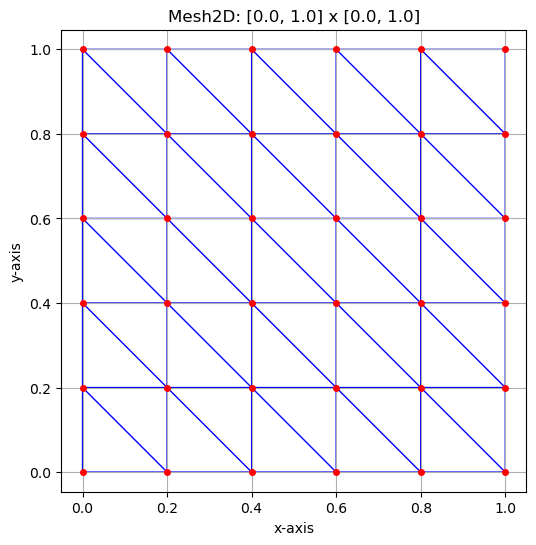

Triangle 0: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 1: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 2: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 3: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 4: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 5: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 6: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 7: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 8: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 9: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 10: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 11: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 12: Asp. Ratio = 1.41, Min. Angle = 45.00 degrees, Area = 0.020000.
Triangle 

In [6]:
# Define mesh parameters.
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0

# Number of divisions along each axis.
nx, ny = 5, 5

# Create a Mesh2D object.
mesh = Mesh2D(x_min, x_max, y_min, y_max, nx, ny)

# Plot the mesh (for visual inspection).
plot_mesh2d(mesh)

# Compute the quality metrics.
aspect_ratios, min_angles, areas = mesh.calculate_quality_metrics()

# Print the results (for all triangles/elements)
for i, (aspect_ratio, min_angle, area) in enumerate(zip(aspect_ratios, min_angles, areas)):
    
    # Check for errors.
    if all(np.isfinite([aspect_ratio, min_angle, area])):
        
        # Print the results.
        print(f"Triangle {i}: "
              f"Asp. Ratio = {aspect_ratio:.2f}, "
              f"Min. Angle = {min_angle:.2f} degrees, Area = {area:.6f}.")
    else:
        
        # Exit the loop with a message.
        print(f"Fatal error in element {i}."
              f"Asp. Ratio = {aspect_ratio:.2f}, "
              f"Min. Angle = {min_angle:.2f} degrees, Area = {area:.6f}.")
        
        break
    # _end_if_
    
# _end_for_

### Solve the Poisson PDE in 2D

1. We define the boundary condition and source functions.

In [8]:
def boundary_condition(x: float, y: float) -> float:
  """
  Example boundary condition: g(x, y) = 0.0.
  
  :param x (float): x coordinate.
  :param y (float): y coordinate.
  
  :return (float): the boundary condition g(x, y).
  """
  return 0.0
# _end_def_

def source_term(x: float, y: float) -> float:
  """
  Source function.
  
  :param x (float): x coordinate.
  :param y (float): y coordinate.
  
  :return (float): the source term f(x, y).
  """
  return np.sin(np.pi*x) * np.sin(np.pi*y)
# _end_def_

**NOTE**: The example of this particular source function $f(x, y)$, was taken from:

https://math.stackexchange.com/questions/4046272/poisson-equation-exact-solution

since it was also given the exact solution $u_{exact}$, that was used later for the convergence error analysis.

2. We create the PoissonFEM2D object with the previously defined parameters and call its solve() method.

In [11]:
# Create a PoissonFEM2D solver.
solver = PoissonFEM2D(mesh, boundary_condition, source_term)

# Solve the system.
solver.solve()

3. We plot its solution against the exact solution (for the given boundary and source terms).

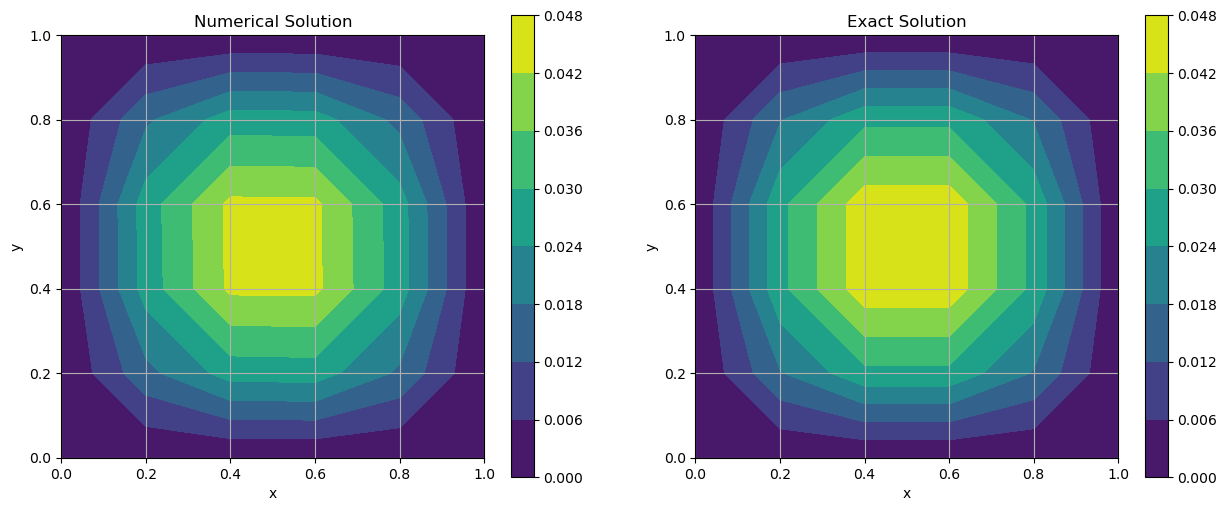

In [13]:
# Reshape the solution into a 2D array for plotting.
solution_2D = solver.solution.reshape((mesh.ny + 1, mesh.nx + 1))

# Define the exact solution as lambda function.
u_exact = lambda x, y: np.sin(np.pi*x) * np.sin(np.pi*y) / (2.0 * np.pi**2)

# Get the exact solution on the same mesh.
u_exact_solution = u_exact(mesh.nodes[:, 0], mesh.nodes[:, 1])

# Reshape the exact solution in 2D.
u_exact_solution = u_exact_solution.reshape((mesh.ny + 1, mesh.nx + 1))

# Create a subplot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot both solutions.
for ax, sol, title in zip((ax1, ax2),
                          (solution_2D, u_exact_solution),
                          ("Numerical Solution", "Exact Solution")):
    
    # Plot the contour of a solution.
    im = ax.contourf(mesh.nodes[:, 0].reshape((mesh.ny + 1, mesh.nx + 1)),
                     mesh.nodes[:, 1].reshape((mesh.ny + 1, mesh.nx + 1)),
                     sol, cmap=plt.get_cmap("viridis"))
    
    # Setup the figure parameters.
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
    ax.set_aspect("equal")
    fig.colorbar(im, ax=ax)
# _end_for_

plt.show()

### Error analysis

To check whether the approximate (numerical) solution converges to the exact one (on the same mesh and using the
same boundary and source functions), we run iteratively the solver on a new (refined) mesh, and we compare the 
solution to the exact one, keeping track of the RMSE. After the (successful) termination of the loop we plot the 
RMSE against the number of steps (divisions along each axis).

    1: n_steps:   5, RMSE: 0.00116327
    2: n_steps:  10, RMSE: 0.00031866
    3: n_steps:  15, RMSE: 0.00014617
    4: n_steps:  20, RMSE: 0.00008355
    5: n_steps:  25, RMSE: 0.00005399
    6: n_steps:  30, RMSE: 0.00003774
    7: n_steps:  35, RMSE: 0.00002786
    8: n_steps:  40, RMSE: 0.00002140
    9: n_steps:  45, RMSE: 0.00001696
   10: n_steps:  50, RMSE: 0.00001376
   11: n_steps:  55, RMSE: 0.00001140
   12: n_steps:  60, RMSE: 0.00000959
   13: n_steps:  65, RMSE: 0.00000818
   14: n_steps:  70, RMSE: 0.00000706
   15: n_steps:  75, RMSE: 0.00000616
   16: n_steps:  80, RMSE: 0.00000542
   17: n_steps:  85, RMSE: 0.00000480
   18: n_steps:  90, RMSE: 0.00000429
   19: n_steps:  95, RMSE: 0.00000385
   20: n_steps: 100, RMSE: 0.00000348


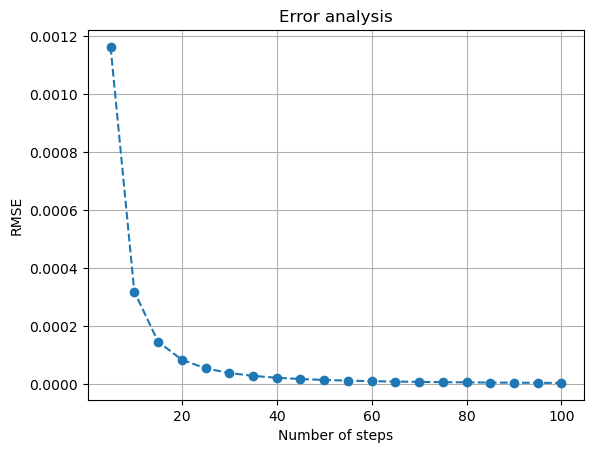

In [15]:
# Store the values of the number of steps and the error.
steps = []
error = []

# Increase the number of divisions by "steps".
step = 5

for i, n_steps in enumerate(range(5, 100+step, step), start=1):
    
    # Generate a mesh with the new n_steps.
    mesh_i = Mesh2D(x_min, x_max, y_min, y_max, nx=n_steps, ny=n_steps)
    
    # Create a new solver object.
    # NOTE: The boundary g(x) and source f(x) remain the same.
    solver_i = PoissonFEM2D(mesh_i, boundary_condition, source_term)
    
    # Solve the PDE on the new grid.
    solver_i.solve()
    
    # Get the difference between the approximate and the exact.
    delta_e = solver_i.solution - u_exact(mesh_i.nodes[:, 0],
                                          mesh_i.nodes[:, 1])
    # Compute Root Mean Squared Error.
    rmse = np.sqrt(np.mean(delta_e**2))

    # Print info.
    print(f"{i:>5}: n_steps: {n_steps:>3}, RMSE: {rmse:0.8f}")

    # Store the results.
    steps.append(n_steps)
    error.append(rmse)
# _end_for_

# Final plot of the RMSE vs N_STEPS.
plt.plot(steps, error, 'o--')
plt.xlabel("Number of steps")
plt.ylabel("RMSE")
plt.title("Error analysis")
plt.grid()
plt.show()

## End of test assignment file